In [64]:
# 📦 E-commerce Product Delivery Timeliness Prediction
# Capstone Project

# ✨ 1. Project Overview
"""
Problem Statement:
An international e-commerce company wants to predict whether product deliveries will arrive on time.

Business Objective:
Develop robust machine learning models to accurately predict delivery timeliness, improve customer satisfaction,
and optimize logistics.

Project Deliverables:
- Comprehensive EDA
- Feature engineering and selection
- Model building and evaluation
- Key business insights
"""

'\nProblem Statement:\nAn international e-commerce company wants to predict whether product deliveries will arrive on time.\n\nBusiness Objective:\nDevelop robust machine learning models to accurately predict delivery timeliness, improve customer satisfaction,\nand optimize logistics.\n\nProject Deliverables:\n- Comprehensive EDA\n- Feature engineering and selection\n- Model building and evaluation\n- Key business insights\n'

In [65]:
# 🗂️ 2. Data Overview

## Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')
import joblib


In [66]:
## Loading the Dataset
df = pd.read_csv('E_Commerce.csv')

In [67]:
## Dataset Snapshot
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [68]:
## Data Types and Missing Values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [69]:
# Convert categorical columns to numeric values
df['Warehouse_block'] = LabelEncoder().fit_transform(df['Warehouse_block'])
df['Mode_of_Shipment'] = LabelEncoder().fit_transform(df['Mode_of_Shipment'])
df['Product_importance'] = LabelEncoder().fit_transform(df['Product_importance'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [70]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


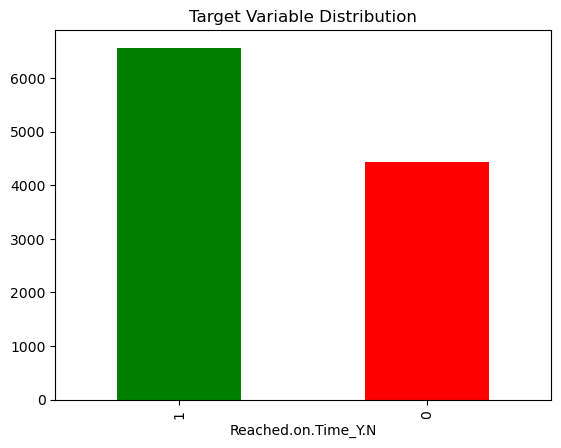

In [71]:
# 📊 3. Exploratory Data Analysis (EDA)

## 3.1 Dataset Summary
df.describe()

## 3.2 Target Variable Distribution
df['Reached.on.Time_Y.N'].value_counts().plot(kind='bar', title='Target Variable Distribution', color=['green', 'red'])
plt.show()

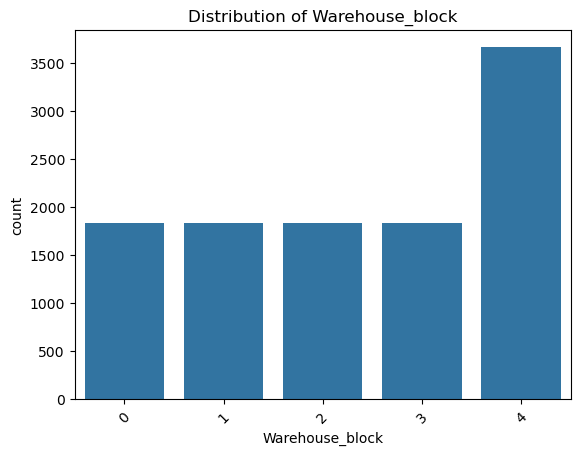

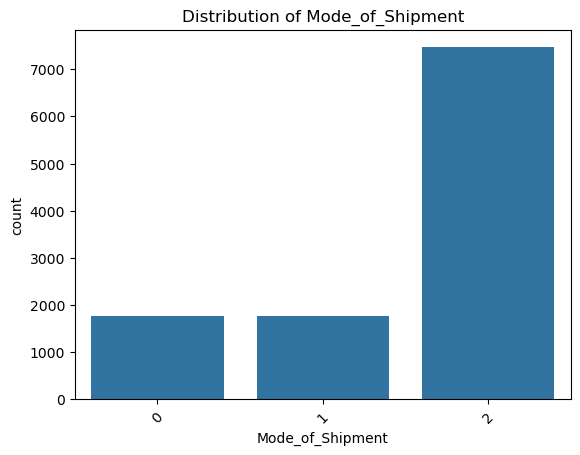

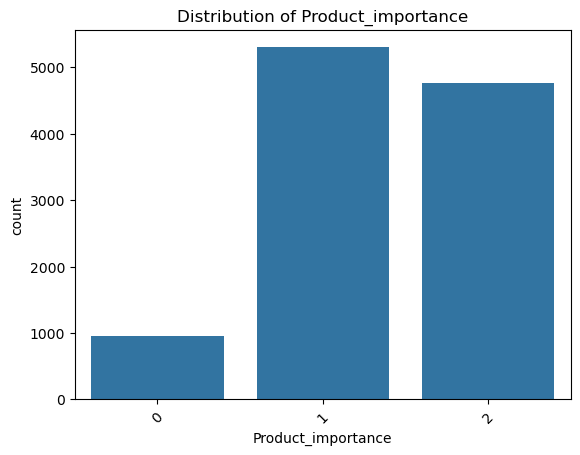

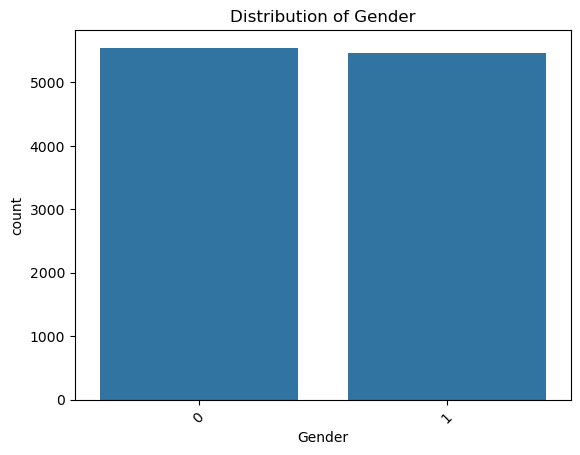

In [72]:
## 3.3 Categorical Feature Distributions
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

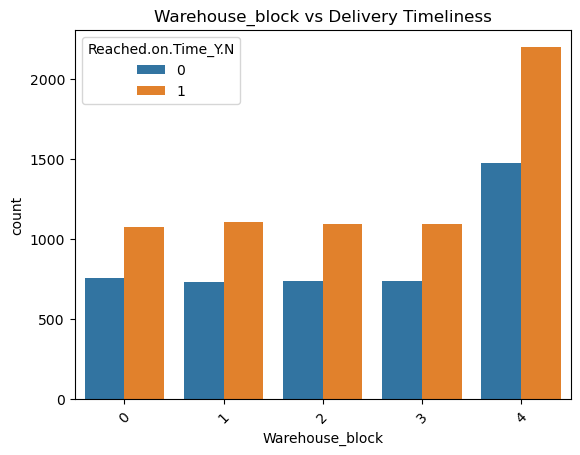

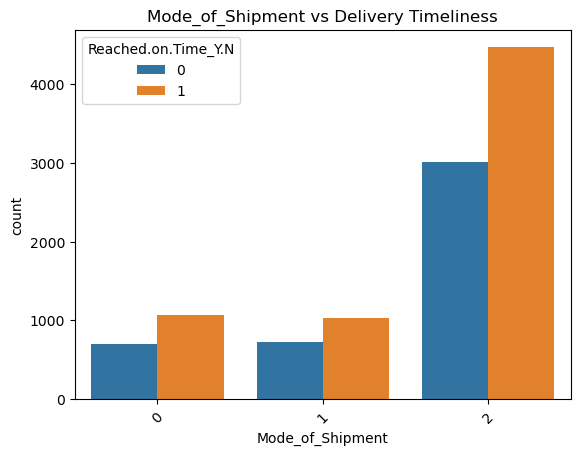

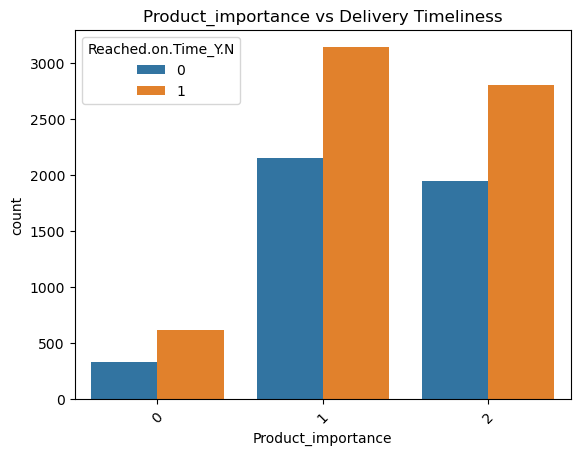

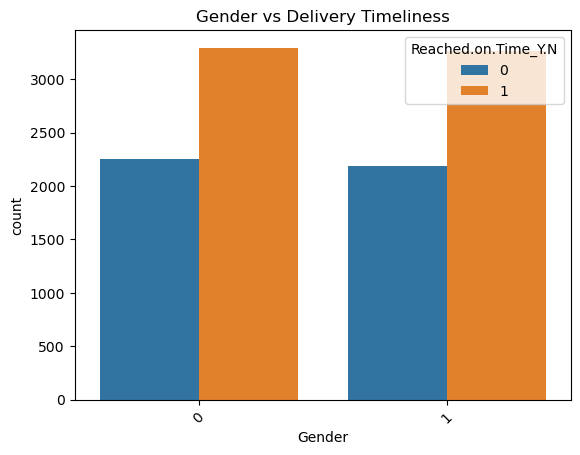

In [73]:
## 3.4 Categorical Features vs Target Variable
for col in categorical_cols:
    sns.countplot(x=col, hue='Reached.on.Time_Y.N', data=df)
    plt.title(f'{col} vs Delivery Timeliness')
    plt.xticks(rotation=45)
    plt.show()


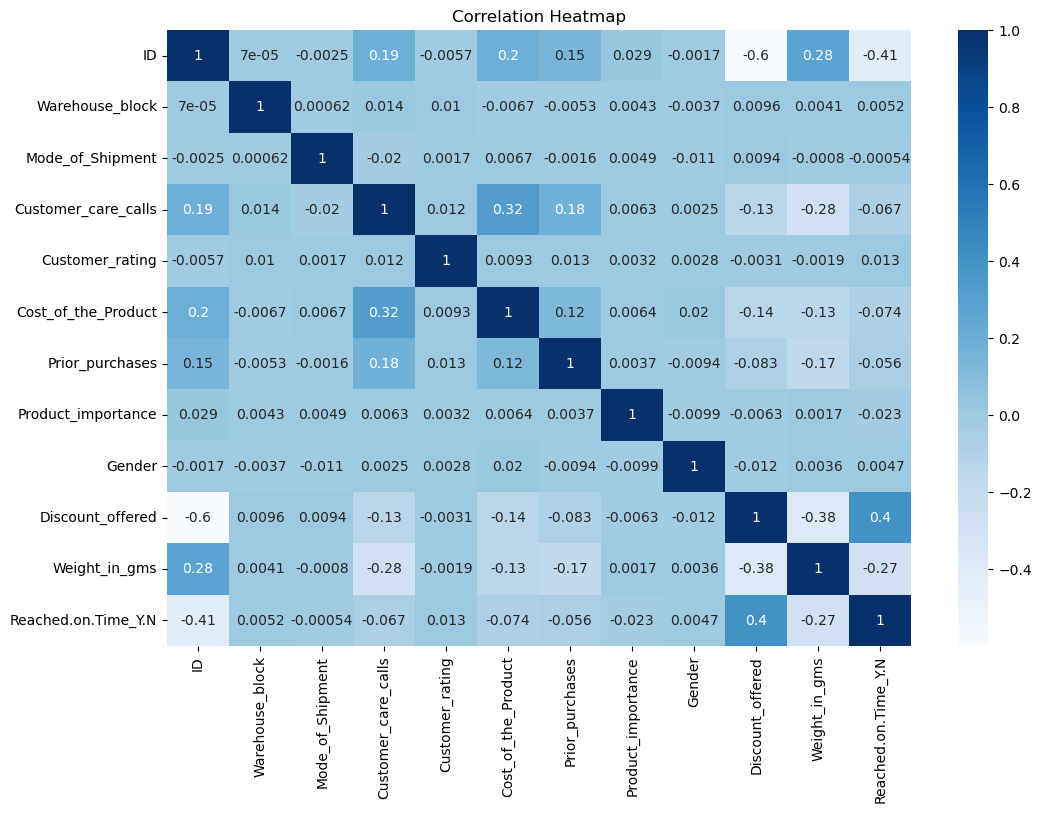

In [74]:
## 3.5 Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [75]:
# 🛠️ 4. Feature Engineering

## Encoding Categorical Variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

## Features and Target Split
X = df.drop(['ID', 'Reached.on.Time_Y.N'], axis=1)
y = df['Reached.on.Time_Y.N']


In [76]:
# ⚙️ 5. Model Development & Evaluation

## 5.1 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
X_train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
8965,4,2,3,5,178,3,1,0,7,4135
5936,0,2,6,3,202,4,2,0,3,4496
10656,3,2,2,5,277,3,2,1,6,1032
3328,2,2,5,5,219,2,2,1,4,4289
9880,2,0,6,3,296,4,1,0,4,1650
...,...,...,...,...,...,...,...,...,...,...
5734,2,1,3,5,275,2,1,0,7,4619
5191,4,1,5,5,187,4,2,0,9,5326
5390,0,2,4,2,137,2,2,0,2,5804
860,0,2,5,3,144,6,2,0,35,1009


In [78]:
X_test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
107,4,2,4,5,216,3,0,1,26,2053
5594,0,1,3,1,220,3,1,0,6,5572
6997,4,0,3,2,215,4,1,0,3,4042
3984,3,0,5,1,160,5,1,0,1,4672
3111,1,2,5,4,229,2,2,0,44,2419
...,...,...,...,...,...,...,...,...,...,...
6885,1,2,4,3,245,6,1,0,3,1155
3909,1,2,2,1,271,2,1,1,7,5875
10548,3,0,3,4,199,3,2,1,10,4925
10317,1,2,2,2,161,3,1,0,5,5999


In [79]:
y_train

8965     0
5936     1
10656    0
3328     0
9880     0
        ..
5734     0
5191     0
5390     1
860      1
7270     0
Name: Reached.on.Time_Y.N, Length: 8799, dtype: int64

In [80]:
y_test

107      1
5594     1
6997     0
3984     0
3111     1
        ..
6885     0
3909     0
10548    1
10317    1
5649     0
Name: Reached.on.Time_Y.N, Length: 2200, dtype: int64

In [81]:
# ====================
# 🧩 6. Logistic Regression Model
# ====================


param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}
lr = LogisticRegression(max_iter=1000, random_state=42)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
print("\nLogistic Regression")
print("Best Params (LR):", grid_lr.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Logistic Regression
Best Params (LR): {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.6359090909090909
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       895
           1       0.69      0.69      0.69      1305

    accuracy                           0.64      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.64      0.64      2200



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Params (DT): {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'criterion': 'gini'}
Accuracy: 0.6872727272727273
              precision    recall  f1-score   support

           0       0.57      0.93      0.71       895
           1       0.91      0.52      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.74      0.73      0.69      2200
weighted avg       0.77      0.69      0.68      2200



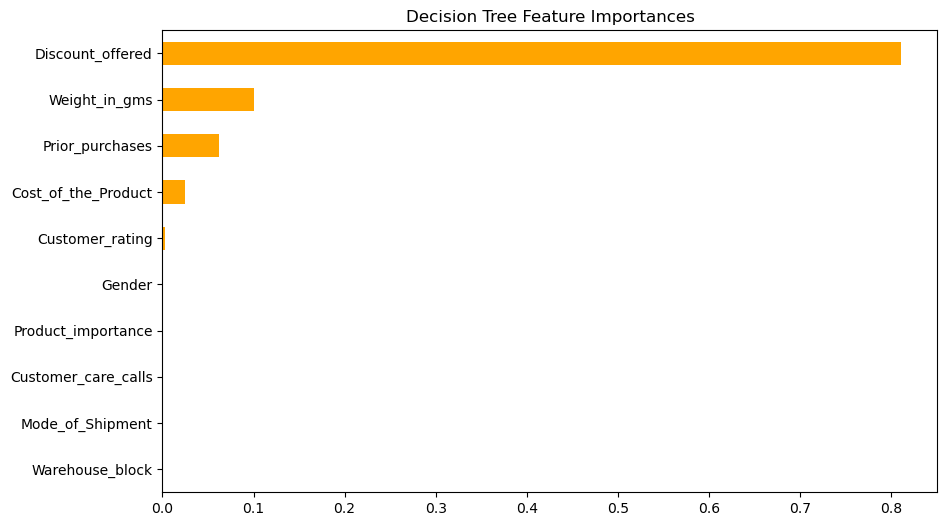

In [82]:
# ====================
# 🌲 7. Decision Tree Model
# ====================

param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}
dt = DecisionTreeClassifier(random_state=42)
rand_dt = RandomizedSearchCV(dt, param_dist_dt, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
rand_dt.fit(X_train, y_train)
best_dt = rand_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
print("Best Params (DT):", rand_dt.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Feature Importance (DT)
importances_dt = pd.Series(best_dt.feature_importances_, index=df.drop(['ID','Reached.on.Time_Y.N'], axis=1).columns)
importances_dt.sort_values().plot(kind='barh', figsize=(10,6), color='orange')
plt.title('Decision Tree Feature Importances')
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Params (RF): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5}
Accuracy: 0.6895454545454546
              precision    recall  f1-score   support

           0       0.57      0.95      0.71       895
           1       0.94      0.51      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.69      2200
weighted avg       0.79      0.69      0.68      2200



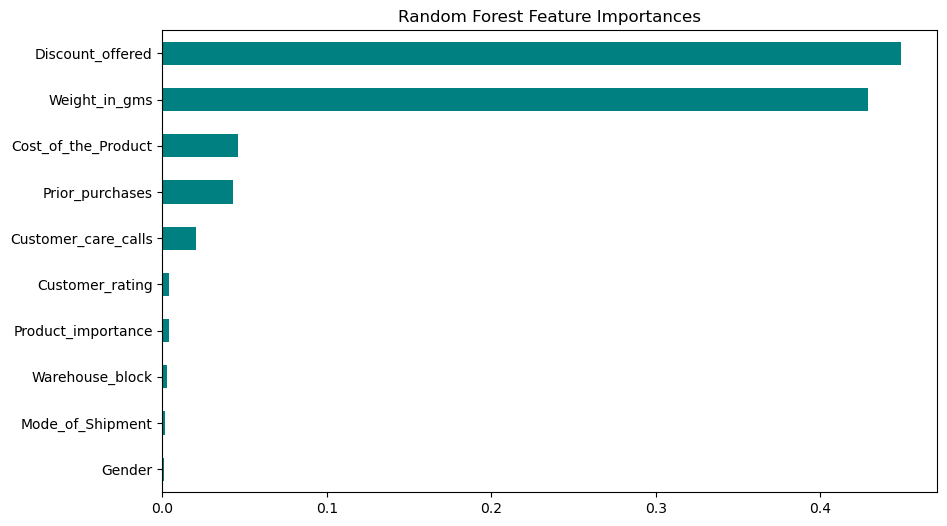

In [83]:
# ====================
# 🌳 8. Random Forest Model
# ====================

param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42)
rand_rf = RandomizedSearchCV(rf, param_dist_rf, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
rand_rf.fit(X_train, y_train)
best_rf = rand_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Best Params (RF):", rand_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature Importance plot (RF)
importances = pd.Series(best_rf.feature_importances_, index=df.drop(['ID','Reached.on.Time_Y.N'], axis=1).columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), color='teal')
plt.title('Random Forest Feature Importances')
plt.show()

In [84]:
# ====================
# 📍 9. K-Nearest Neighbors Model
# ====================


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
print("Best Params (KNN):", grid_knn.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params (KNN): {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.6568181818181819
              precision    recall  f1-score   support

           0       0.57      0.61      0.59       895
           1       0.72      0.69      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.66      0.66      2200



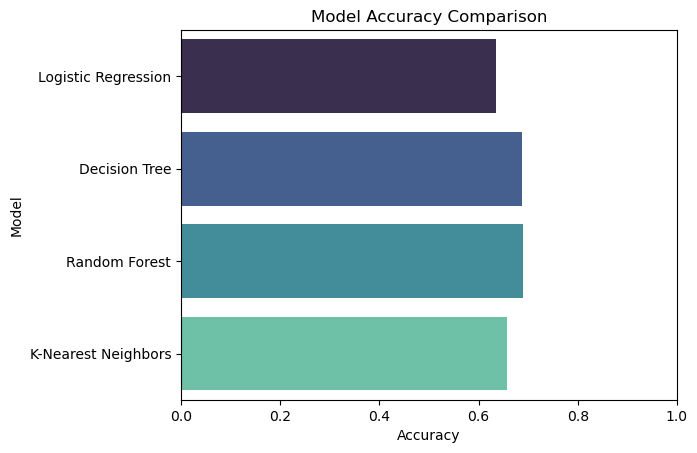

In [85]:
# ====================
# 🏆 10. Model Performance Comparison
# ====================

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt),
              accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_knn)]

comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

sns.barplot(x='Accuracy', y='Model', data=comparison_df, palette='mako')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.show()


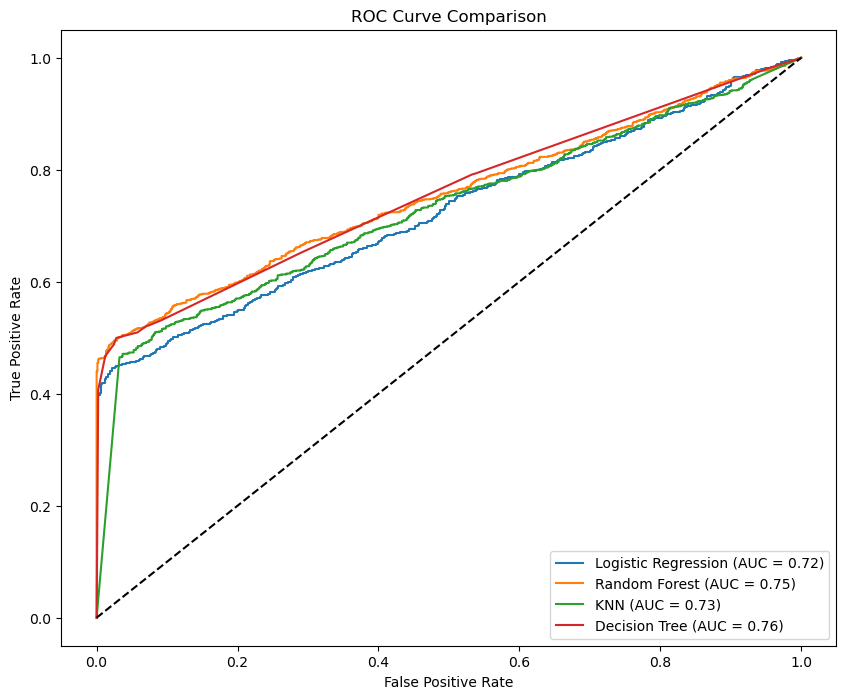

In [86]:
# ====================
# 📉 11. ROC Curves for All Models
# ====================

# Probabilities
y_pred_prob_lr = best_lr.predict_proba(X_test)[:,1]
y_pred_prob_rf = best_rf.predict_proba(X_test)[:,1]
y_pred_prob_knn = best_knn.predict_proba(X_test)[:,1]
y_pred_prob_dt = best_dt.predict_proba(X_test)[:,1]

# ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)

plt.figure(figsize=(10,8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_prob_lr):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_prob_rf):.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_score(y_test, y_pred_prob_knn):.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_pred_prob_dt):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

In [87]:
# ====================
# 💾 13. Save the Best Model (Random Forest)
# ====================
# Select model with highest accuracy
accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'KNN': accuracy_score(y_test, y_pred_knn),
    'Decision Tree': accuracy_score(y_test, y_pred_dt)
}
best_model_name = max(accuracies, key=accuracies.get)
print(f"Best Model: {best_model_name}")

model_mapping = {
    'Logistic Regression': best_lr,
    'Random Forest': best_rf,
    'KNN': best_knn,
    'Decision Tree': best_dt
}

best_model = model_mapping[best_model_name]
joblib.dump(best_model, 'best_delivery_prediction_model.pkl')
print("✅ Best model saved as 'best_delivery_prediction_model.pkl'")


Best Model: Random Forest
✅ Best model saved as 'best_delivery_prediction_model.pkl'
